# Objective: 

* To predict whether a liability customer will buy a personal loan or not.
* Identify which variables are most significant.
* Identify which segment of customers should be targeted more.


# Data:
**Loan_Modelling.csv** - it contains information about car models.
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? 
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# Loading libraries

In [981]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

In [982]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Library to split data
from sklearn.model_selection import train_test_split

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Loading and exploring the data

Loading the data into python to explore and understand it.

In [983]:
df = pd.read_csv('Loan_Modelling.csv')

In [984]:
# copying data to another varaible to avoid any changes to original data
loans = df.copy()

### View the first and last 5 rows of the dataset.

In [985]:
loans.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [986]:
loans.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


`ID` is just an index for the data entry. In all likelihood, this column will not be a significant factor in determining whether a liability customer will buy a personal loan or not.

Having said that, there are instances where the index of the data entry contains the information about time factor (an entry with a smaller index corresponds to data entered years ago). Therefore, we will not drop this variable just yet. Let us see if there is any relationship with the price when we do a bivariate analysis.

### Understand the shape of the dataset.

In [987]:
loans.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns of data

### Check the data types of the columns for the dataset.

In [988]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations -**
* Personal_Loan is the dependent variable - type integer.
* All the dependent variables except for CCAvg are integer type.

### Summary of the dataset.

In [989]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observations-**   

* The average customer age is 45 with the youngest being 23 and the oldest being 67.
* The minimum years of experience has a negative value of -3 years.
* Average income is 73k with a min of 8k and max of 224k.
* There is a range of zip codes. Current description of data doesn't help interpret zip code just yet but we will investigate more in depth during EDA.
* On average customers have two people families with the min of 1 person to 4 people.
* The average spending on credit cards per month is 1.9k. There are customers with 0 spending while others spend as much as 10k.
* Average mortgage for customers is 56.49k. There are entries with 0 for mortgage which would lead us to assume that these customers rent or have some other arrangements.
* Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard are either 1 or 0.

In [990]:
# checking for unique values in ID column
loans["ID"].nunique()

5000

* Since all the values in ID column are unique we can drop it

In [991]:
loans.drop(["ID"], axis=1, inplace=True)

### Check for missing values

In [992]:
loans.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing vaues in out dataset

### Univariate analysis

In [993]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observations on Age

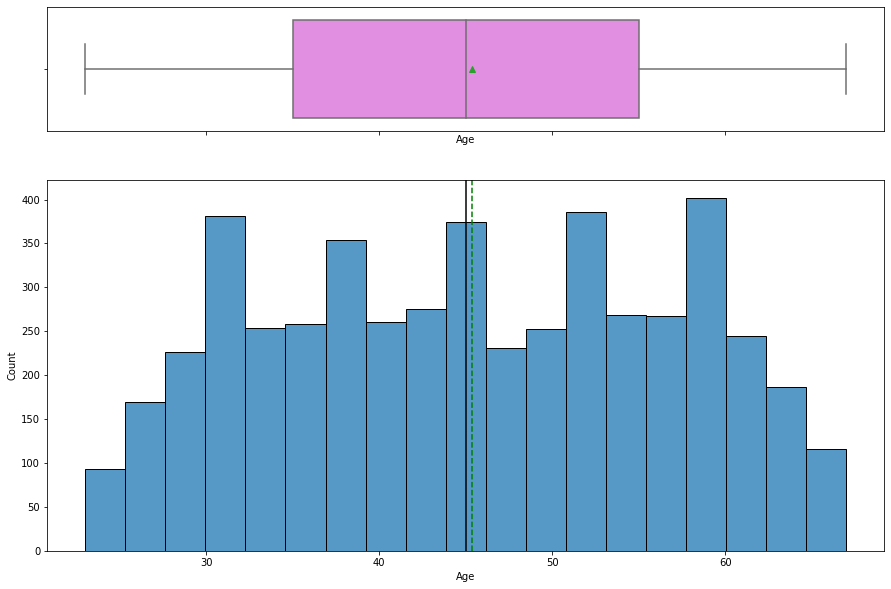

In [994]:
histogram_boxplot(loans["Age"])

- The distribution of the age doesn't appear to be skewed
- The boxplot does not show any outliers
- The mean and the median are both very close in the distribution

## Observations on Experience

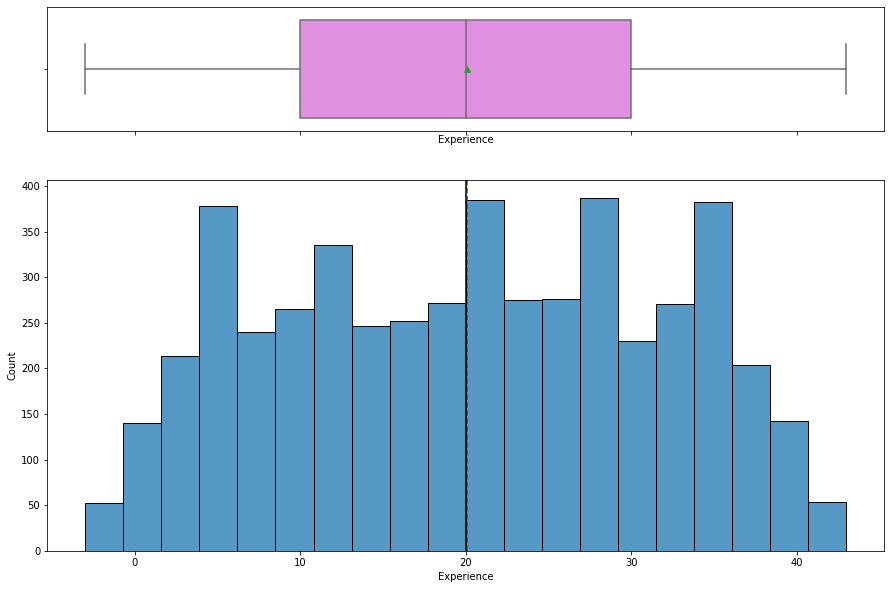

In [995]:
histogram_boxplot(loans["Experience"])

- The distribution of the experience doesn't appear to be skewed
- The boxplot does not show any outliers
- The mean and the median are both very close in the distribution

## Observations on Income

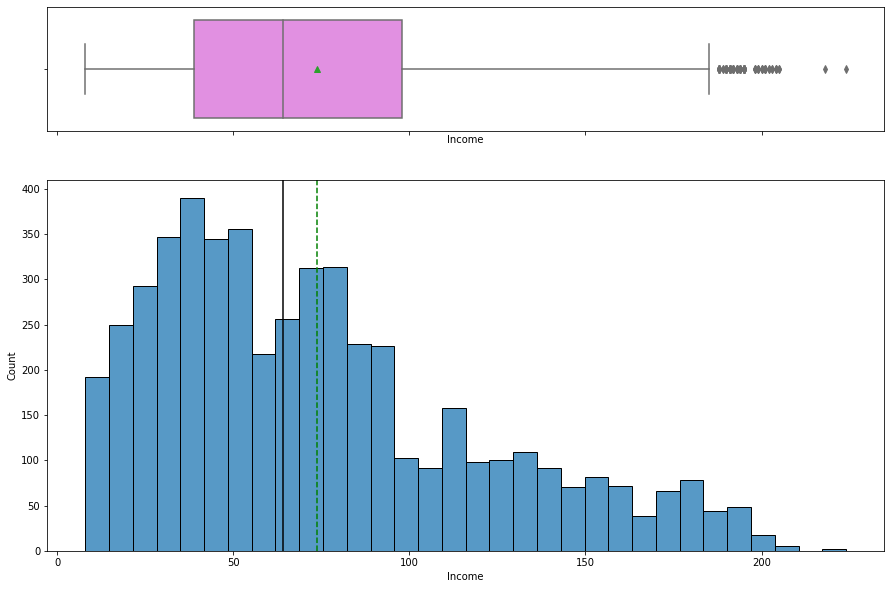

In [996]:
histogram_boxplot(loans["Income"])

- The distribution of the income slightly skewed to the left
- The boxplot shows outliers on the upper end

## Observations on Zip Code

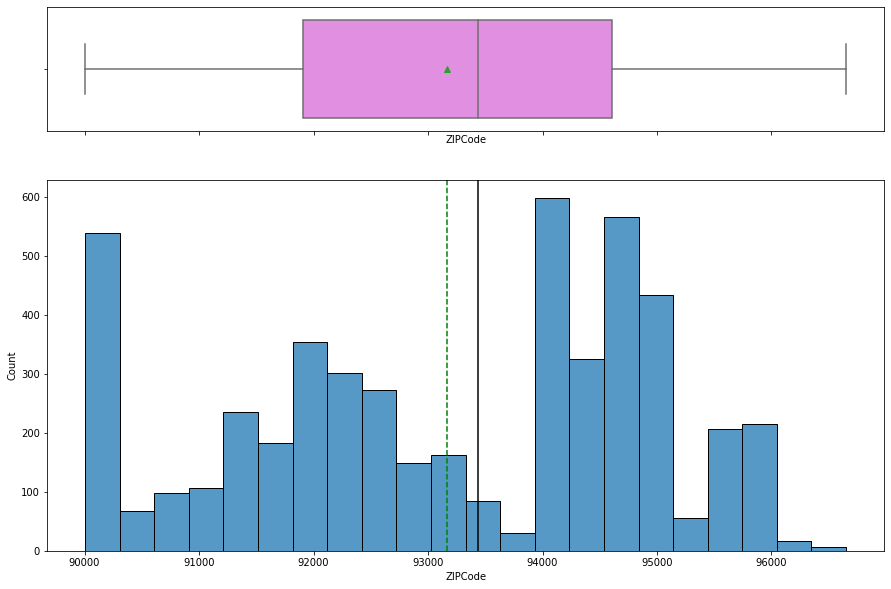

In [997]:
histogram_boxplot(loans["ZIPCode"])

- Zip code does not appear to have a trend.
- There is not much that can be determined based on this trend. 
- We will be converting the zip code to cities later on.

## Observations on Credit Card Average

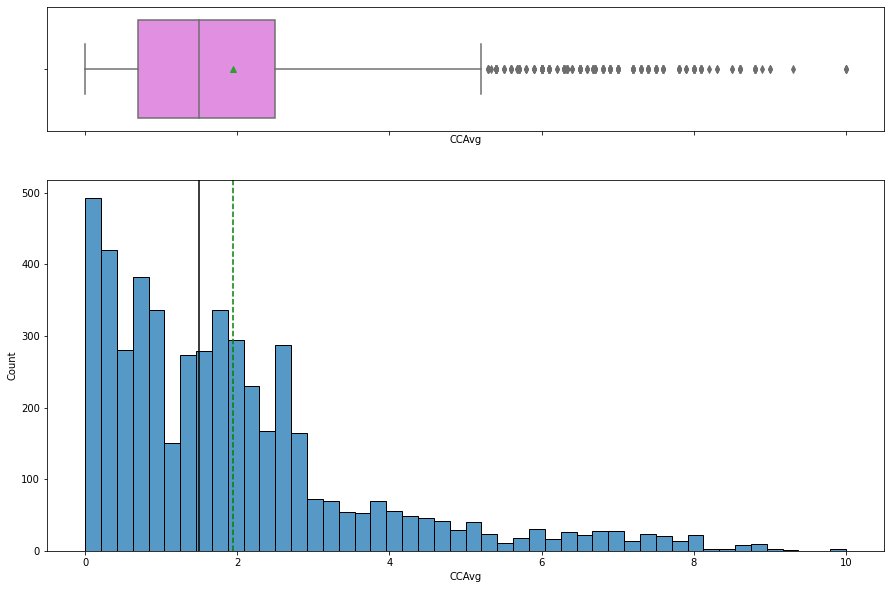

In [998]:
histogram_boxplot(loans["CCAvg"])

- The distribution of the credit card average is very skewed to the left
- The boxplot shows outliers on the upper end

## Observations on Mortgage

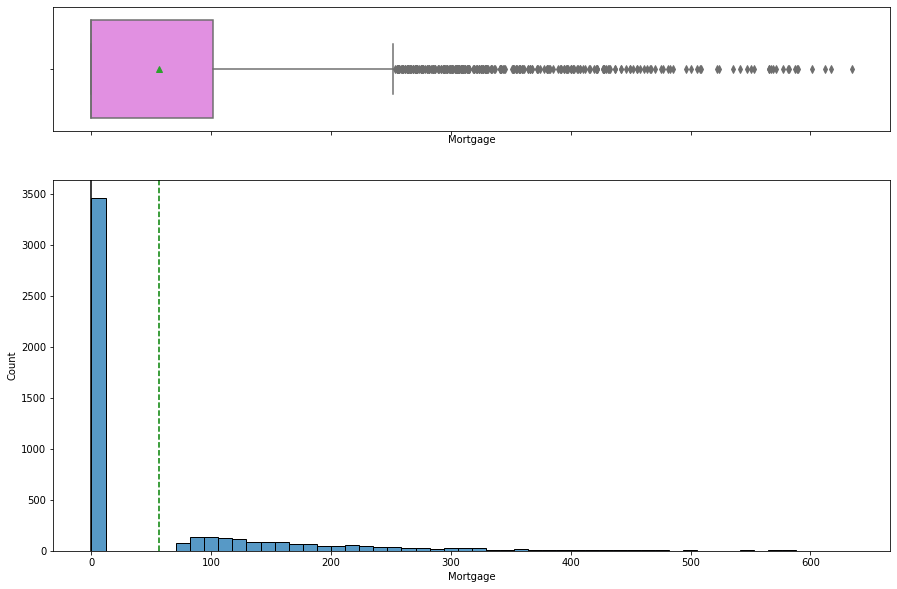

In [999]:
histogram_boxplot(loans["Mortgage"])

- The distribution of the mortgage is heavily skewed to the left
- The boxplot shows outliers on the upper end

In [1000]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Observations on Family

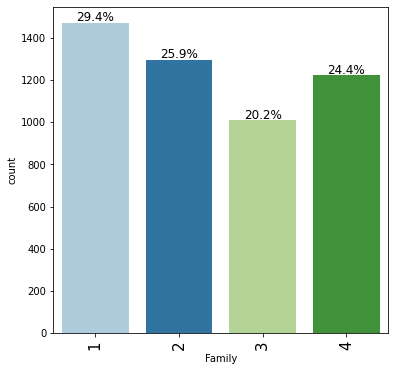

In [1001]:
labeled_barplot(loans, "Family", perc=True)

- A majority of the customers are single (in a 1 person family)
- The next highest counts are 2 and 4 people families

## Observations on Education

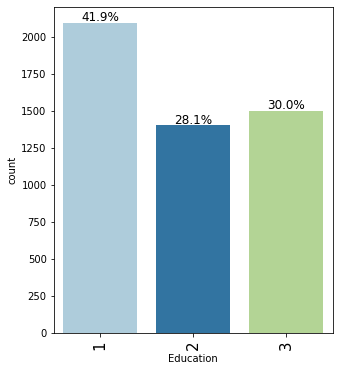

In [1002]:
labeled_barplot(loans, "Education", perc=True)

- Most customers have an undergraduate degree at 41.9%
- 28.1% of customers have a graduate degree while 30.0% have advanced/professional education

## Observations on Personal Loan

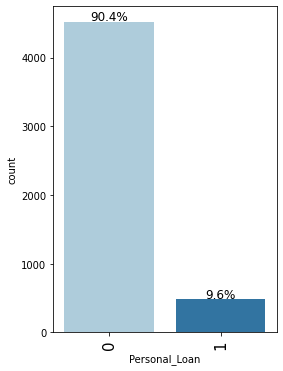

In [1003]:
labeled_barplot(loans, "Personal_Loan", perc=True)

- 90.4% of customers did not the personal loan offered to them during the last campaign

## Observations on Securities Account

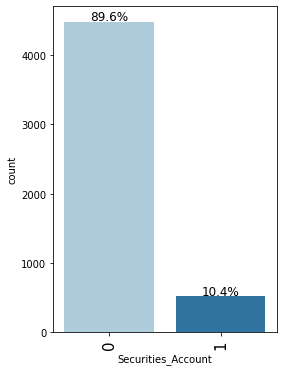

In [1004]:
labeled_barplot(loans, "Securities_Account", perc=True)

- 10.4% have securities accounts with the bank

## Observations on Certificate of Deposit Account

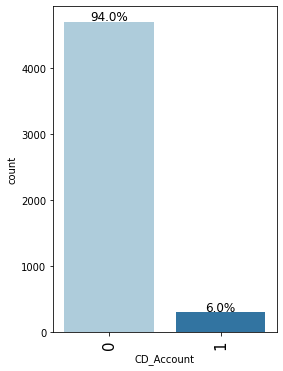

In [1005]:
labeled_barplot(loans, "CD_Account", perc=True)

- 6% of customers have a certificate of deposit account with the bank

## Observations on Online

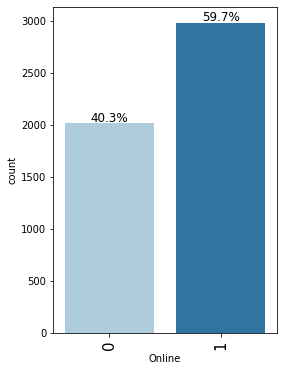

In [1006]:
labeled_barplot(loans, "Online", perc=True)

- 59% of customers use internet banking facilities

## Observations on Credit Card

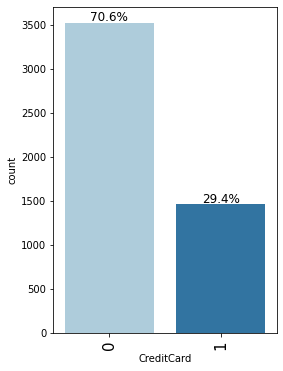

In [1007]:
labeled_barplot(loans, "CreditCard", perc=True)

- 29.4% of customers use a credit card issued by another bank

## Bivariate Analysis

In [1008]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


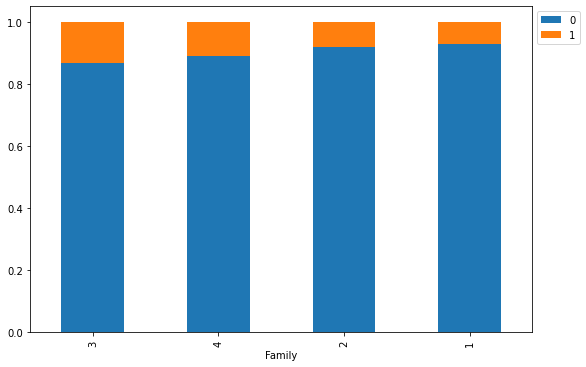

In [1009]:
stacked_barplot(loans, "Family", "Personal_Loan")

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


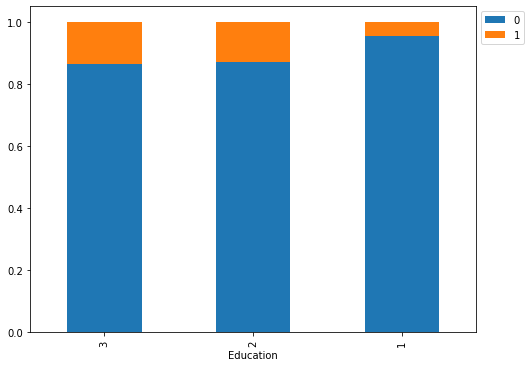

In [1010]:
stacked_barplot(loans, "Education", "Personal_Loan")

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


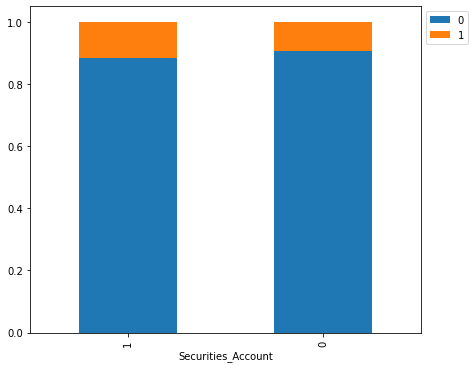

In [1011]:
stacked_barplot(loans, "Securities_Account", "Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


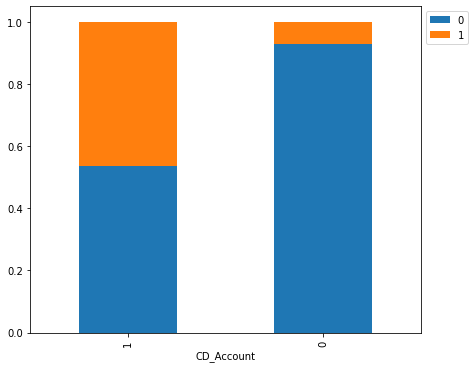

In [1012]:
stacked_barplot(loans, "CD_Account", "Personal_Loan")

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


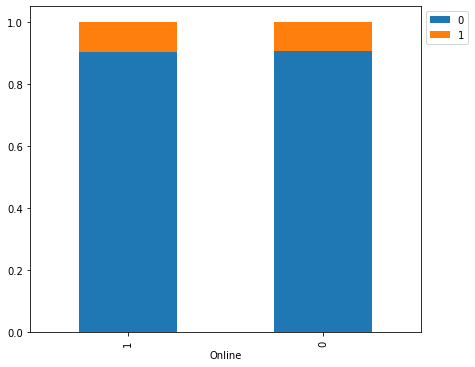

In [1013]:
stacked_barplot(loans, "Online", "Personal_Loan")

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


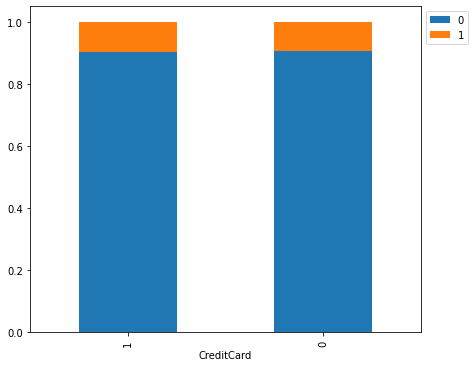

In [1014]:
stacked_barplot(loans, "CreditCard", "Personal_Loan")

In [1015]:
loans_pairplot = loans.drop(["Securities_Account", "CD_Account", "Online", "CreditCard"], axis=1)

In [1016]:
loans_pairplot

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan
0,25,1,49,91107,4,1.6,1,0,0
1,45,19,34,90089,3,1.5,1,0,0
2,39,15,11,94720,1,1.0,1,0,0
3,35,9,100,94112,1,2.7,2,0,0
4,35,8,45,91330,4,1.0,2,0,0
...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0
4996,30,4,15,92037,4,0.4,1,85,0
4997,63,39,24,93023,2,0.3,3,0,0
4998,65,40,49,90034,3,0.5,2,0,0


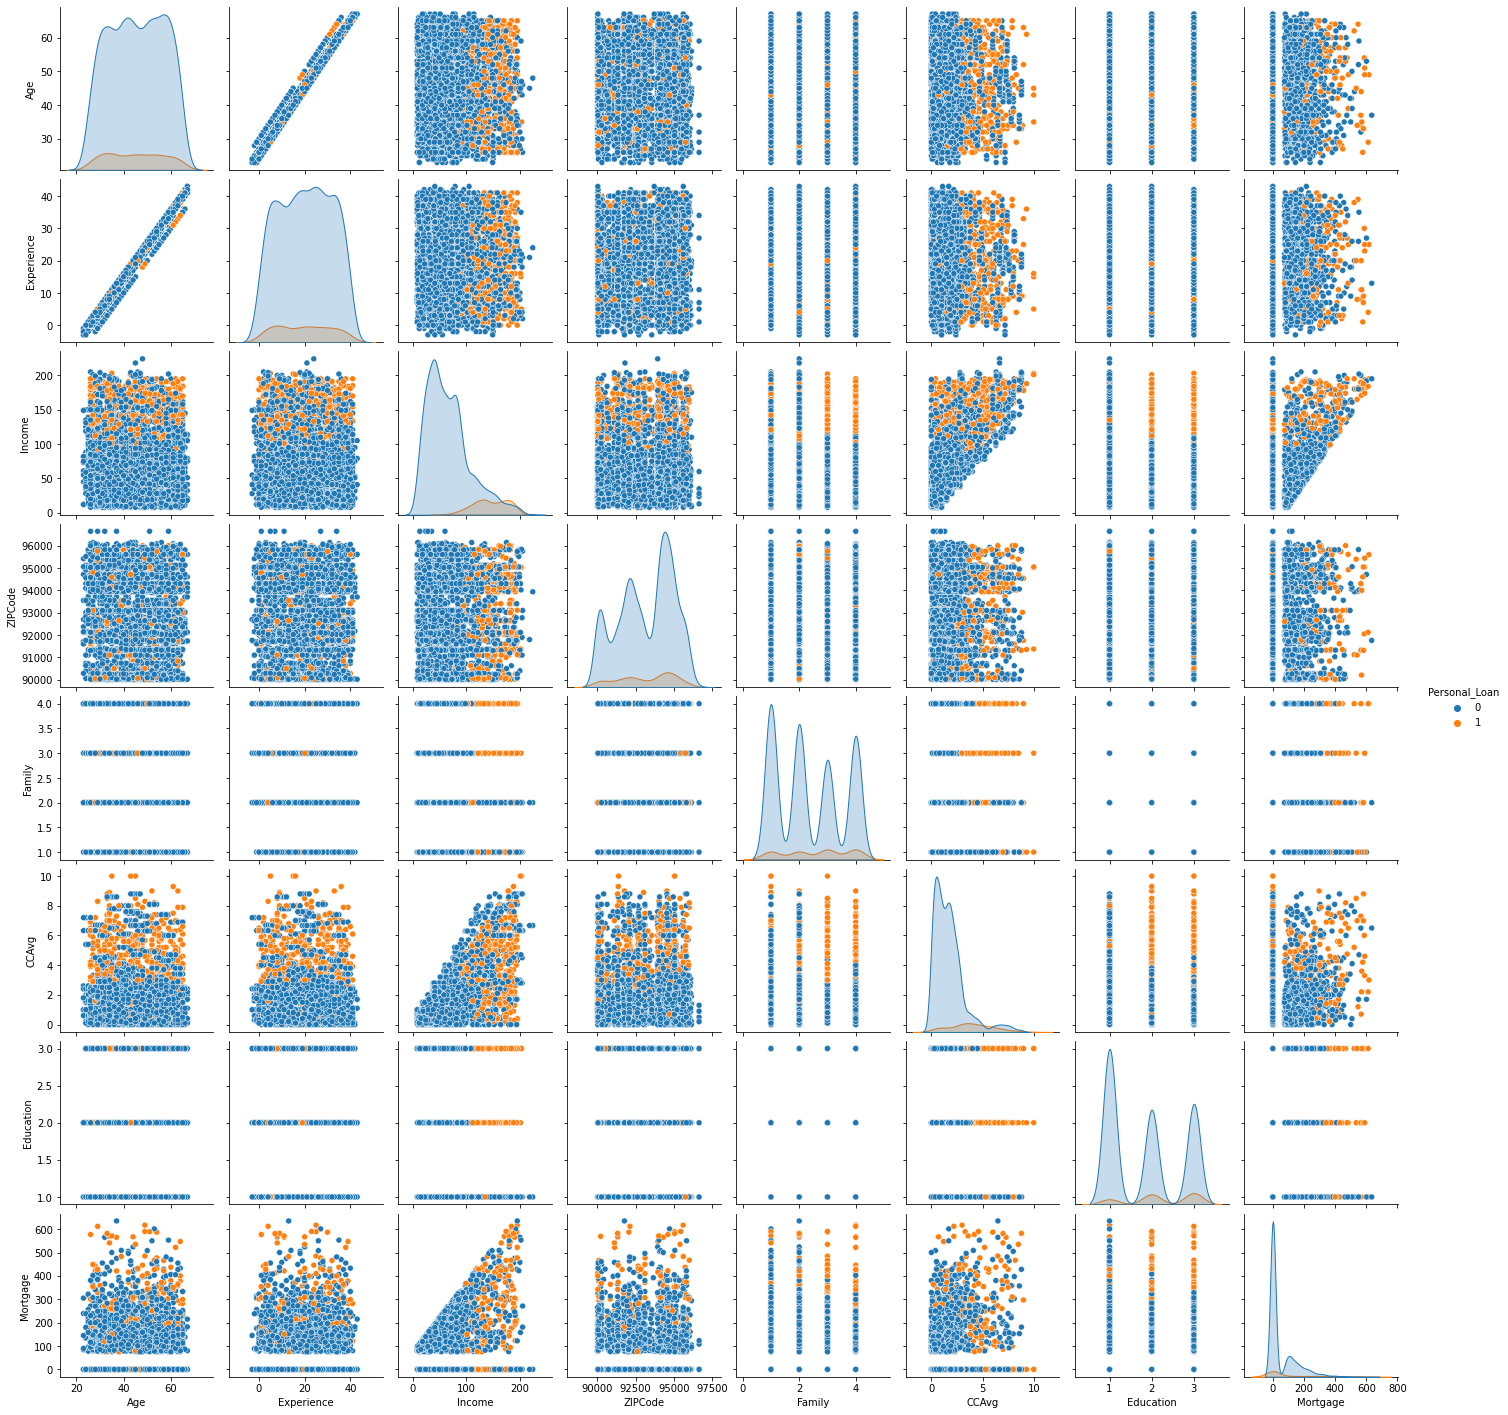

In [1017]:
sns.pairplot(data=loans_pairplot, hue="Personal_Loan")

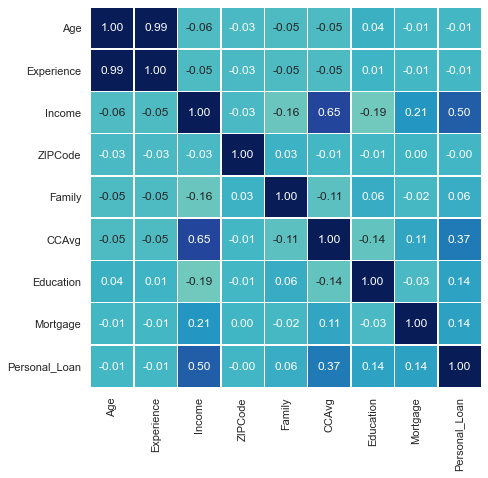

In [1114]:
sns.set(rc={"figure.figsize": (7, 7)})
sns.heatmap(
    loans_pairplot.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

## Key Observations

1. CD account seems to have some influence if the customer is likely to purchase the personal loan.
2. Most other comparisons seem equally distributed.
3. There is a very strong correlation between experience and age based on the pairplot.
4. There are also some correlation between CCAvg and Income.

## Converting Zip Codes to Cities

* The ZIPCodes column has a lot of unique values in it and the numbers can be difficult to interpret in our model. 
* Because of this we will convert the zip codes to corresponding cities.

In [1018]:
! pip install uszipcode
from uszipcode import SearchEngine

In [1019]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine()

def zco(x):
    city = search.by_zipcode(x).major_city
    return city if city else 'None'

loans['City'] = loans['ZIPCode'].apply(zco)

In [1020]:
loans.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Pasadena
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Berkeley
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Northridge


In [1021]:
loans['City'].nunique()

245

In [1022]:
loans['ZIPCode'].nunique()

467

* We managed to reduce the number of unique values of zip codes from 467 to 245 by converting zip codes to cities. This will make the dataset easier to manage when building our models, thus we will drop the ZIPCodes column.

In [1023]:
loans.drop(["ZIPCode"], axis=1, inplace = True)

In [1024]:
loans.City[loans['City'].map(loans['City'].value_counts()) <= 30] = "City_Other"

In [1025]:
loans['City'].nunique()

36

* 245 counts in the new Cities column is still too many unique values so we will try to reduce the number further by grouping cities with unique counts that are less than 30.
* This has brought us down to 36 from 245

### Outliers

In [1026]:
numeric_columns = loans.select_dtypes(include=np.number).columns.tolist()

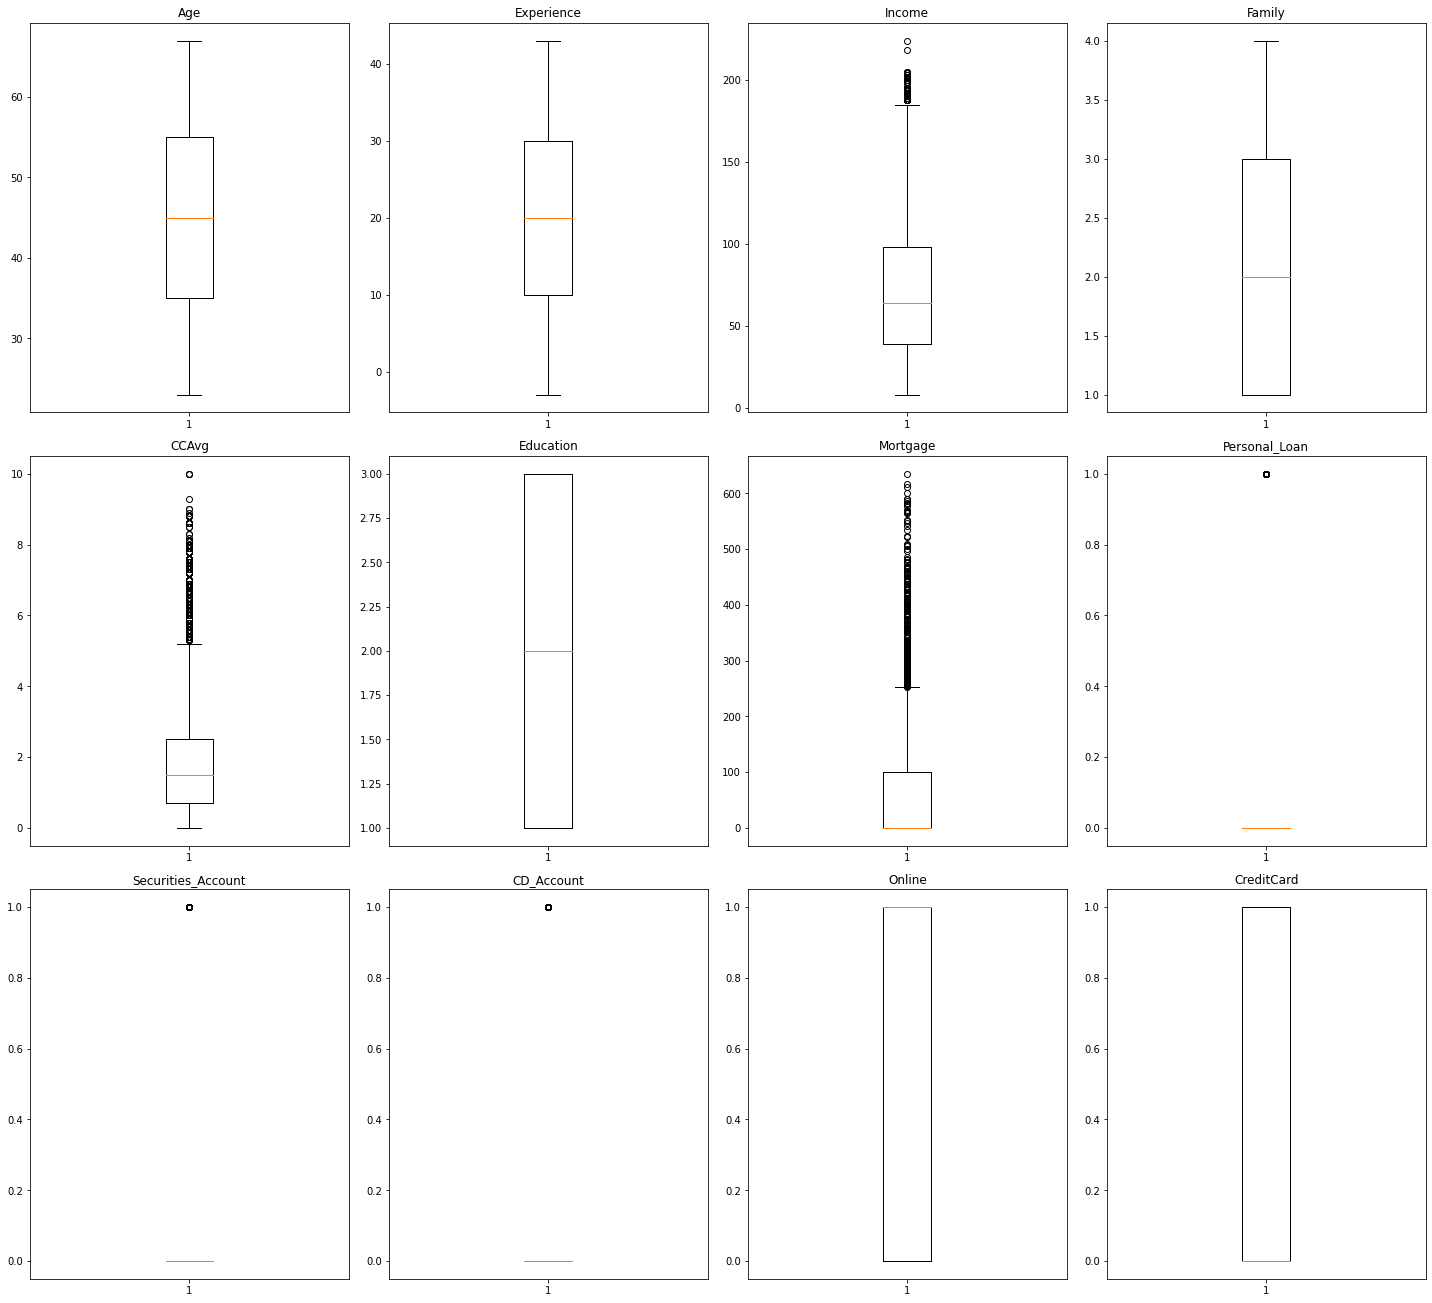

In [1027]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loans[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Three of our variables appear to have outliers: Income, CCAvg, and Mortgage

* We will treat only these three variable for outliers.

* We will exclude the other variables as they either do not have outliers or they have values of 1 or 0.

### Outlier Treatment

In [1028]:
# Let's treat outliers by flooring and capping
def treat_outliers(loans, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    cars: dataframe
    col: name of the column
    """
    Q1 = loans[col].quantile(0.25)  # 25th quantile
    Q3 = loans[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    loans[col] = np.clip(loans[col], Lower_Whisker, Upper_Whisker)

    return loans


def treat_outliers_all(loans, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    cars: data frame
    """
    for c in col_list:
        loans = treat_outliers(loans, c)

    return loans

In [1029]:
numerical_col = loans.select_dtypes(include=np.number).columns.tolist()
loans = treat_outliers_all(loans, loans[['Income', 'CCAvg', 'Mortgage']])

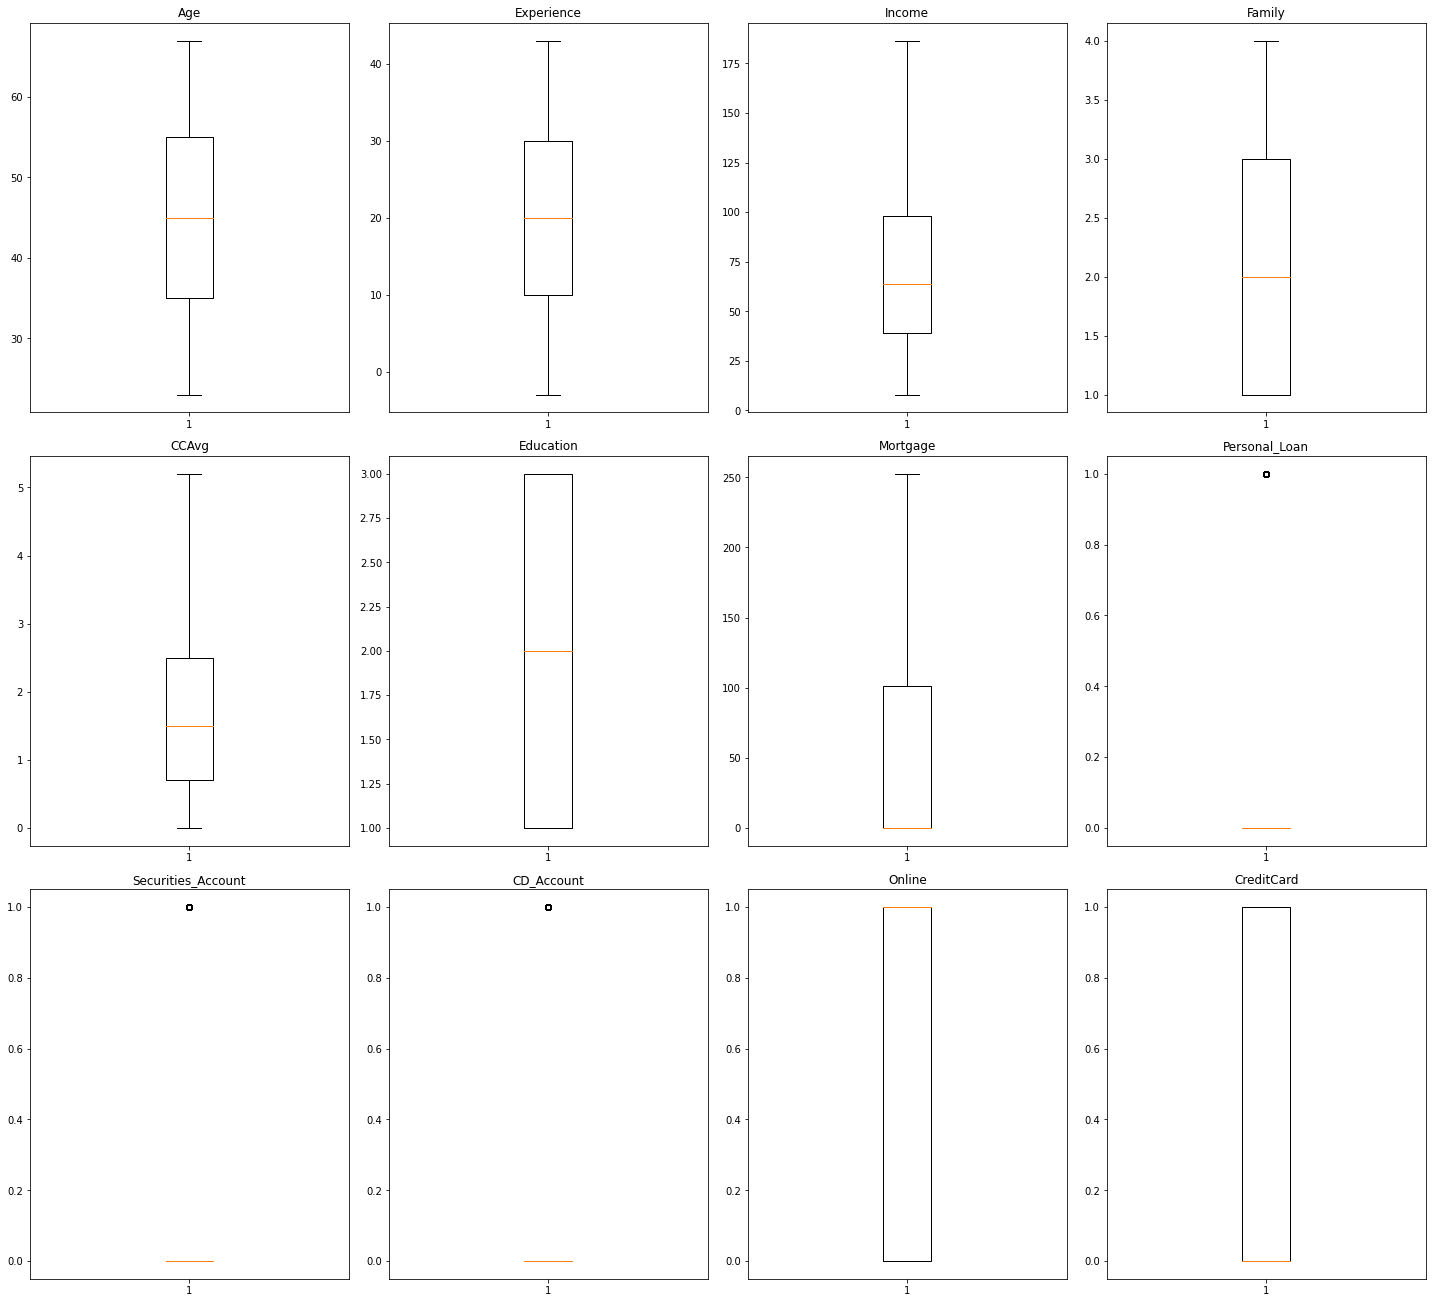

In [1030]:
# Verifying via box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loans[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All numerical variables that had outliers have been treated.
* Only the target variables have been treated for outliers.

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.

## Split Data

In [1031]:
dtloans = loans.copy()

* Making a copy to use for decesion tree analysis later

In [1032]:
def split(*kwargs):
    '''
    Function to split data into X and Y then one hot encode the X variable.
    Returns training and test sets
    *kwargs : Variable to remove from the dataset before splitting into X and Y
    '''
    X = loans.drop([*kwargs], axis=1)
    Y = loans['Personal_Loan']

    X = pd.get_dummies(X,drop_first=True)
    X = add_constant(X) ## Why a constant??

    #Splitting data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
    return X_train,X_test, y_train, y_test

In [1033]:
X_train,X_test, y_train, y_test = split('Personal_Loan')

In [1034]:
print('Shape of training set:', X_train.shape)
print('Shape of test set:', X_test.shape)

Shape of training set: (3500, 47)
Shape of test set: (1500, 47)


In [1035]:
X_train.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,City_City_Other,City_Claremont,City_Davis,City_El Segundo,City_Emeryville,City_Fallbrook,City_Fremont,City_Goleta,City_Hayward,City_Huntington Beach,City_Irvine,City_La Jolla,City_Livermore,City_Los Altos,City_Los Angeles,City_Menlo Park,City_Monterey,City_Newbury Park,City_None,City_Northridge,City_Oakland,City_Palo Alto,City_Pasadena,City_Redwood City,City_Riverside,City_Sacramento,City_San Diego,City_San Francisco,City_San Jose,City_San Luis Obispo,City_Santa Barbara,City_Santa Clara,City_Santa Cruz,City_Santa Monica,City_Stanford
1334,1.0,47,22,35.0,2,1.3,1,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4768,1.0,38,14,39.0,1,2.0,2,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65,1.0,59,35,131.0,1,3.8,1,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177,1.0,29,3,65.0,4,1.8,2,244.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4489,1.0,39,13,21.0,3,0.2,2,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1036]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a liability customer is not going to buy a personal loan but they do - Loss of opportunity
2. Predicting a liability customer is going to buy a personal loan but they don't - Loss of resources


### Which Loss is greater ? 

* Loss of opportunity will be the greater loss.

### How to reduce this loss i.e need to reduce False Negatives ?
* Company would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.

In [1037]:
def get_metrics_score(model,library,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    if library=='stats':
        score_list=[] 
    
        pred_train = (model.predict(train)>threshold)
        pred_test = (model.predict(test)>threshold)

        pred_train = np.round(pred_train)
        pred_test = np.round(pred_test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)
    
        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)
    
        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)
    
        train_f1 = f1_score(train_y,pred_train)
        test_f1 = f1_score(test_y,pred_test)
        
        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    elif library=='sklearn':
        score_list=[] 
    
        pred_train = model.predict(train)
        pred_test = model.predict(test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)

        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)

        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)

        train_f1 = f1_score(train_y,pred_train)
        test_f1 = f1_score(test_y,pred_test)


        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [1038]:
def make_confusion_matrix(model,library,test_X,y_actual,threshold=0.5,labels=[0, 1]):
    '''
    model : classifier to predict values of X
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    test_X: test set
    y_actual : ground truth  
    threshold: thresold for classifiying the observation as 1
    
    '''
    
    if library == 'sklearn':
        y_predict = model.predict(test_X)
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0,1])
        df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                      columns = [i for i in ['Predicted - No','Predicted - Yes']])
        group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize = (10,7))
        sns.heatmap(df_cm, annot=labels,fmt='')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    elif library =='stats':
        y_predict = model.predict(test_X)>threshold
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
        df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                      columns = [i for i in ['Predicted - No','Predicted - Yes']])
        group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize = (10,7))
        sns.heatmap(df_cm, annot=labels,fmt='')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

### Logistic Regression (with Sklearn library)

Accuracy on training set :  0.9548571428571428
Accuracy on test set :  0.9453333333333334
Recall on training set :  0.6555891238670695
Recall on test set :  0.5771812080536913
Precision on training set :  0.8314176245210728
Precision on test set :  0.819047619047619
F1 on training set :  0.7331081081081081
F1 on test set :  0.6771653543307087


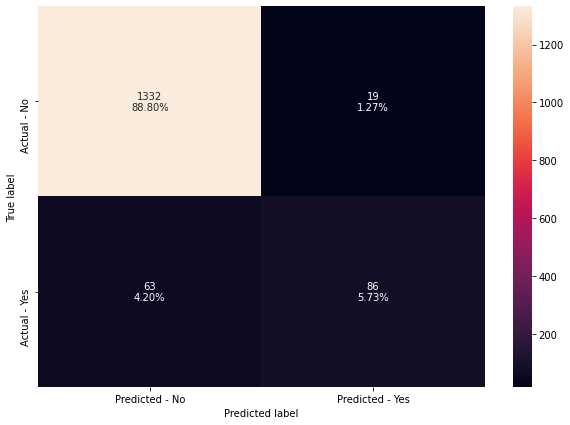

In [1039]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lr = LogisticRegression(solver='newton-cg',random_state=42,fit_intercept=False)
model  = lr.fit(X_train,y_train)

# confusion matrix

make_confusion_matrix(lr,'sklearn',X_test,y_test)

# Let's check model performances for this model
scores_LR = get_metrics_score(model,'sklearn',X_train,X_test,y_train,y_test)

- We have build a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

### Logistic Regression (with statsmodels library)

In [1040]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score(lg,'stats',X_train,X_test,y_train,y_test)

         Current function value: 0.111907
         Iterations: 35
Accuracy on training set :  0.9591428571428572
Accuracy on test set :  0.946
Recall on training set :  0.6888217522658611
Recall on test set :  0.5771812080536913
Precision on training set :  0.8507462686567164
Precision on test set :  0.8269230769230769
F1 on training set :  0.7612687813021703
F1 on test set :  0.6798418972332017


In [1041]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3453
Method:                           MLE   Df Model:                           46
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.6425
Time:                        14:56:00   Log-Likelihood:                -391.67
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                9.039e-265
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -13.0895      2.128     -6.152      0.000     -17.259      -8.919
Age                      -0.0788      0.077     -1.019      0.308      -0.230       0.073
Experience                0.0903      0.077      1.170      0.242      -0.061       0.242
Income                    0.0576      0.004     16.000      0.000       0.051       0.065
Family                    0.8129      0.101      8.060      0.000       0.615       1.011
CCAvg                     0.4349      0.069      6.257      0.000       0.299       0.571
Education                 1.8952      0.155     12.212      0.000       1.591       2.199
Mortgage                  0.0012      0.001      1.274      0.203      -0.001       0.003
Securities_Account       -1.3318      0.411     -3.243      0.001      -2.137      -0.527
CD_Account                4.1526      0.440      9.448      0.000       3.291       5.014
Online                   -0.7357      0.206     -3.572      0.000      -1.139      -0.332
CreditCard               -1.3091      0.267     -4.894      0.000      -1.833      -0.785
City_City_Other          -0.4489      0.434     -1.034      0.301      -1.299       0.402
City_Claremont           -0.2391      0.859     -0.278      0.781      -1.923       1.445
City_Davis               -1.8287      0.941     -1.944      0.052      -3.673       0.015
City_El Segundo          -0.6953      1.018     -0.683      0.495      -2.691       1.300
City_Emeryville          -3.5297      4.362     -0.809      0.418     -12.080       5.021
City_Fallbrook           -1.5518      1.321     -1.175      0.240      -4.140       1.037
City_Fremont             -0.4305      1.454     -0.296      0.767      -3.280       2.419
City_Goleta              -1.6888      2.171     -0.778      0.437      -5.943       2.565
City_Hayward              0.0380      1.004      0.038      0.970      -1.929       2.005
City_Huntington Beach    -0.3306      1.098     -0.301      0.763      -2.483       1.821
City_Irvine               0.9065      0.848      1.070      0.285      -0.755       2.568
City_La Jolla            -0.3969      0.827     -0.480      0.631      -2.018       1.224
City_Livermore          -20.7644    1.1e+04     -0.002      0.998   -2.16e+04    2.15e+04
City_Los Altos           -0.4176      1.383     -0.302      0.763      -3.128       2.292
City_Los Angeles         -0.3845      0.532     -0.722      0.470      -1.428       0.659
City_Menlo Park          -1.6089      1.144     -1.406      0.160      -3.852       0.634
City_Monterey            -1.5970      1.003     -1.592      0.111      -3.563       0.369
City_Newbury Park        -1.3727      1.308     -1.049      0.294      -3.937       1.192
City_None                 0.9040      1.091      0.829      0.407      -1.234       3.042
City_Northridge          -1.0498      1.165     -0.901      0.368      -3.334       1.234
City_Oakland             -1.2672      1.087     -1.166      0.244      -3.397       0.863
C

### Multicollinearity

In [1042]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train.astype(float).copy()

In [1043]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                    484.737326
Age                       96.454222
Experience                96.407976
Income                     1.836260
Family                     1.046105
CCAvg                      1.726788
Education                  1.131578
Mortgage                   1.031649
Securities_Account         1.158711
CD_Account                 1.365266
Online                     1.051325
CreditCard                 1.118101
City_City_Other            5.305785
City_Claremont             1.188837
City_Davis                 1.434149
City_El Segundo            1.217869
City_Emeryville            1.122527
City_Fallbrook             1.115759
City_Fremont               1.108571
City_Goleta                1.116639
City_Hayward               1.182241
City_Huntington Beach      1.141302
City_Irvine                1.192502
City_La Jolla              1.386031
City_Livermore             1.130709
City_Los Altos             1.129648
City_Los Angeles           2.

* Age and Experience have high VIF but the rest of the variables in the summary appear to be reliable.
* We will now remove the insignificant features (p-value>0.05).
  * All the categorical levels of Age, Experience, Mortgage, and City have a high p-value.Hence, the variable can be dropped.

#### Drop insignificant variables

In [1044]:
X_train1,X_test1, y_train1, y_test1 = split('Personal_Loan','Age')

In [1045]:
logit1 = sm.Logit(y_train1, X_train1 )
lg1 = logit1.fit()
print(lg1.summary())

# Let's check model performances for this model
scores_LR = get_metrics_score(lg1,'stats',X_train1,X_test1,y_train1,y_test1)

         Current function value: 0.112059
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3454
Method:                           MLE   Df Model:                           45
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.6420
Time:                        14:56:00   Log-Likelihood:                -392.21
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.693e-265
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -15.0586      0.929    -16.215      0.000     -16.879     -13.238
Experience                0.0122

* Not much change in recall, let's drop Experience now

In [1046]:
X_train2,X_test2, y_train2, y_test2 = split('Personal_Loan','Age','Experience')

In [1047]:
logit2 = sm.Logit(y_train2, X_train2 )
lg2 = logit2.fit()
print(lg2.summary())

# Let's Look at Model Performance
scores_LR = get_metrics_score(lg2,'stats',X_train2,X_test2,y_train2,y_test2)

         Current function value: 0.112358
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3455
Method:                           MLE   Df Model:                           44
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.6410
Time:                        14:56:01   Log-Likelihood:                -393.25
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.304e-265
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -14.7346      0.892    -16.512      0.000     -16.484     -12.986
Income                    0.0576

* Not much change in recall.

In [1048]:
X_train3,X_test3, y_train3, y_test3 = split('Personal_Loan','Age','Experience', 'Mortgage')

In [1049]:
logit3 = sm.Logit(y_train3, X_train3)
lg3 = logit3.fit()
print(lg3.summary())

# Let's Look at Model Performance
scores_LR = get_metrics_score(lg3,'stats',X_train3,X_test3,y_train3,y_test3)

         Current function value: 0.112543
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3456
Method:                           MLE   Df Model:                           43
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.6404
Time:                        14:56:01   Log-Likelihood:                -393.90
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                4.251e-266
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -14.6968      0.890    -16.517      0.000     -16.441     -12.953
Income                    0.0577

* No significant change in the recall.

In [1050]:
X_train4,X_test4, y_train4, y_test4 = split('Personal_Loan','Age','Experience', 'Mortgage', 'City')

In [1051]:
logit4 = sm.Logit(y_train4, X_train4)
lg4 = logit4.fit()
print(lg4.summary())

# Let's Look at Model Performance
scores_LR = get_metrics_score(lg4,'stats',X_train4,X_test4,y_train4,y_test4)

Optimization terminated successfully.
         Current function value: 0.116989
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.6262
Time:                        14:56:01   Log-Likelihood:                -409.46
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                6.420e-291
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.5420      0.769    -18.899      0.000     -16.050     -13.034
Incom

* There was some slight change in the recall value in the test set.

### Metrics of final model 'lg4'

Accuracy on training set :  0.9568571428571429
Accuracy on test set :  0.9486666666666667
Recall on training set :  0.6676737160120846
Recall on test set :  0.610738255033557
Precision on training set :  0.8435114503816794
Precision on test set :  0.8272727272727273
F1 on training set :  0.7453625632377741
F1 on test set :  0.7027027027027027


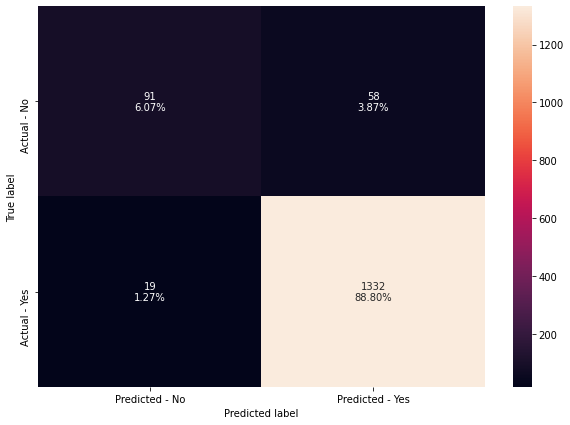

In [1052]:
#confusion matrix
make_confusion_matrix(lg4,'stats',X_test4,y_test4)

# metrics
scores_LR = get_metrics_score(lg4,'stats',X_train4,X_test4,y_train4,y_test4)

In [1053]:
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.6262
Time:                        14:56:01   Log-Likelihood:                -409.46
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                6.420e-291
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.5420      0.769    -18.899      0.000     -16.050     -13.034
Income                 0.0559      0.003     16.403      0.000       0.049       0.063
Family              

#### ROC-AUC
* ROC-AUC on training set

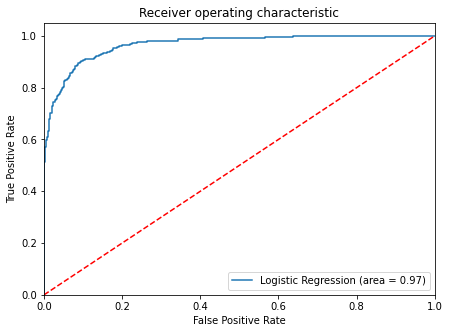

In [1054]:
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train4))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

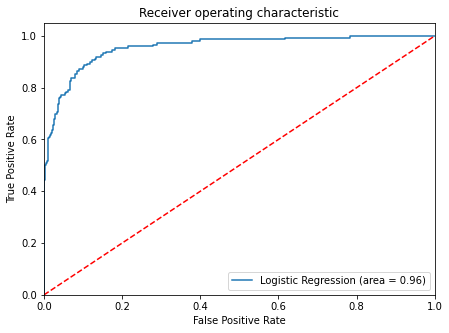

In [1055]:
logit_roc_auc_test = roc_auc_score(y_test, lg4.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test4))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.

### Coefficient interpretations

* Coefficients of Income, Family, CCAvg, Education, and CD_Account are positive; an increase in these will lead to an increase in chances of a customer buying a personal loan.
* Coefficients of Securities_Account, Online, and Credit Card are all negative; an increase in these will lead to a decrease in chances of a customer buying a personal loan.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [1056]:
odds = np.exp(lg4.params) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train4.columns, columns=['odds']).T # adding the odds to a dataframe

,const,Income,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard
odds,4.836004e-07,1.057445,2.152445,1.474822,6.059412,0.312396,48.021466,0.516076,0.310117


**Percentage change in odds**

In [1057]:
perc_change_odds = (np.exp(lg4.params)-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train4.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,const,Income,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard
change_odds%,-99.999952,5.744541,115.244464,47.482201,505.94125,-68.760433,4702.146644,-48.392401,-68.988328


### Coefficient interpretations

* `Income`: Holding all other features constant a unit change in Income will increase the odds of a customer buying a personal loan by 1.05 times or a 5.74% increase in odds.
* `Family`: Holding all other features constant a unit change in Family will increase the odds of a customer buying a personal loan by 2.15 times or a 115.24% increase in the odds.

`Interpretation for other attributes can be done similarly.`

### Model Performance Improvement
* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [1058]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_train, lg4.predict(X_train4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.099799405947113


Accuracy on training set :  0.9045714285714286
Accuracy on test set :  0.9093333333333333
Recall on training set :  0.9003021148036254
Recall on test set :  0.8657718120805369
Precision on training set :  0.4974958263772955
Precision on test set :  0.5265306122448979
F1 on training set :  0.6408602150537634
F1 on test set :  0.6548223350253808
ROC-AUC Score on training set :  0.9026597352181586
ROC-AUC Score on test set :  0.889954743938122


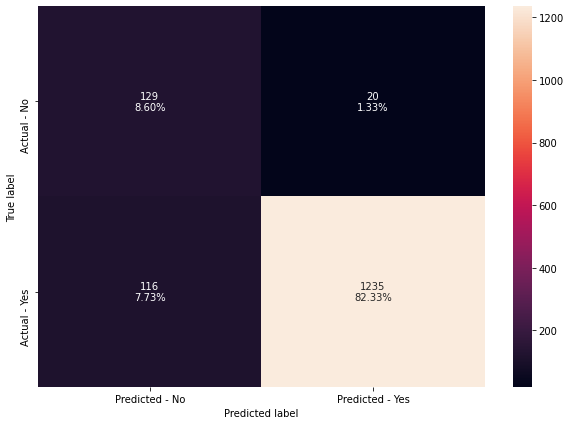

In [1059]:
#confusion matrix
make_confusion_matrix(lg4,'stats',X_test4,y_test4,threshold=optimal_threshold_auc_roc)

# checking model performance
scores_LR = get_metrics_score(lg4,'stats',X_train4,X_test4,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

* The model is giving a generalized performance and the recall has increased significantly.

#### Let's use Precision-Recall curve and see if we can find a better threshold

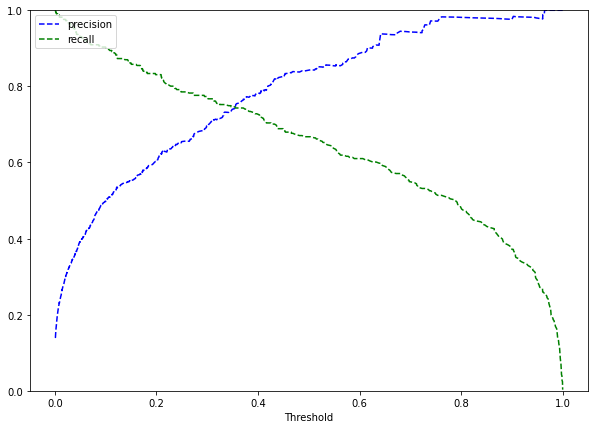

In [1060]:
y_scores=lg4.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.39, we get high recall and a good precision as well.

Accuracy on training set :  0.9545714285714286
Accuracy on test set :  0.9433333333333334
Recall on training set :  0.7311178247734139
Recall on test set :  0.6375838926174496
Precision on training set :  0.7756410256410257
Precision on test set :  0.753968253968254
F1 on training set :  0.7527216174183515
F1 on test set :  0.6909090909090909
ROC-AUC Score on training set :  0.8545144188556244
ROC-AUC Score on test set :  0.8073189633331511


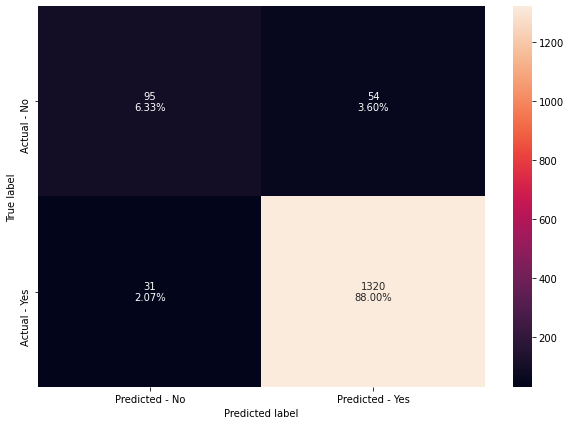

In [1061]:
optimal_threshold_curve = 0.39

#confusion matrix
make_confusion_matrix(lg4,'stats',X_test4,y_test,threshold=optimal_threshold_curve)

# checking model performance
scores_LR = get_metrics_score(lg4,'stats',X_train4,X_test4,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

* The model is performing well but the model with 0.09 threshold performed better.

### Model Performance Summary

In [1062]:
# defining list of model
models = [lg4]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,'stats',X_train4,X_test4,y_train,y_test,flag=False)
    k = get_metrics_score(model,'stats',X_train4,X_test4,y_train4,y_test4,threshold=optimal_threshold_auc_roc,flag=False)
    l = get_metrics_score(model,'stats',X_train4,X_test4,y_train4,y_test4,threshold=optimal_threshold_curve,flag=False)
    
    # intial logistic regression model
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    # logistic regression with threshold = 0.09
    acc_train.append(k[0])
    acc_test.append(k[1])
    recall_train.append(k[2])
    recall_test.append(k[3])
    precision_train.append(k[4])
    precision_test.append(k[5])
    f1_train.append(k[6])
    f1_test.append(k[7])
    
    # logistic regression with threshold = 0.39
    acc_train.append(l[0])
    acc_test.append(l[1])
    recall_train.append(l[2])
    recall_test.append(l[3])
    precision_train.append(l[4])
    precision_test.append(l[5])
    f1_train.append(l[6])
    f1_test.append(l[7])

In [1063]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0 .09',
                                          'Logistic Regression - Optimal threshold = 0 .39'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                    

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic Regression Model - Statsmodels,0.956857,0.948667,0.667674,0.610738,0.843511,0.827273,0.745363,0.702703
1,Logistic Regression - Optimal threshold = 0 .09,0.904571,0.909333,0.900302,0.865772,0.497496,0.526531,0.640860,0.654822
2,Logistic Regression - Optimal threshold = 0 .39,0.954571,0.943333,0.731118,0.637584,0.775641,0.753968,0.752722,0.690909


## Conclusion and Recommendations
- The best test recall is 86% but the test precision is low i.e ~52% at the same time. This means that the model is not good at identifying prospective customers, therefore the bank can lose many opportunities of campaigning personal loans to prospective customers.   
- We saw our analysis that customers who use the online banking feature are less likely to purchase a personal loan. 
The bank can improve its online presence or perhaps campaign via other means.
- We saw that customers who have more credit cards less likely to purchase a personal loan while customers with more monthly credit card payments are more likely to purchse a personal loan. The bank should focus more on customers with fewer credit cards and that have higher monthly payments.
- Our analysis showed that families with more members are more likely to purchase a personal loan. The bank can focus more on customers with larger families.
- Our analysis showed that customers with security accounts are less likely to purchase a personal loan. This implies that the bank has good security for its customers. The bank should focus its campaigns to customers who are not their customers.

## Build Decision Tree Model

In [1064]:
X = dtloans.drop("Personal_Loan" , axis=1)
y = dtloans.pop("Personal_Loan")

* Using the dtloans data set that was created as a copy before it was used in the logistic regression model.

In [1065]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,City_City_Other,City_Claremont,City_Davis,City_El Segundo,City_Emeryville,City_Fallbrook,City_Fremont,City_Goleta,City_Hayward,City_Huntington Beach,City_Irvine,City_La Jolla,City_Livermore,City_Los Altos,City_Los Angeles,City_Menlo Park,City_Monterey,City_Newbury Park,City_None,City_Northridge,City_Oakland,City_Palo Alto,City_Pasadena,City_Redwood City,City_Riverside,City_Sacramento,City_San Diego,City_San Francisco,City_San Jose,City_San Luis Obispo,City_Santa Barbara,City_Santa Clara,City_Santa Cruz,City_Santa Monica,City_Stanford
0,25,1,49.0,4,1.6,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,34.0,3,1.5,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1066]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [1067]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [1068]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.98


In [1069]:
#Checking number of positives
y.sum(axis = 0)

480

**What does a bank want?**
* The bank wants to maxamize personal loan sales - it can face 2 types of losses here: 
   * Whenever bank targets a personal loan to a customer, they don't buy it.
   * A bank doesn't target a personal loan to a customer thinking they won't buy but in reality they will - oppurtunity loss.

**Which loss is greater ?**
* Customer not buying a personal loan.

In [1070]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1071]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

## Confusion Matrix

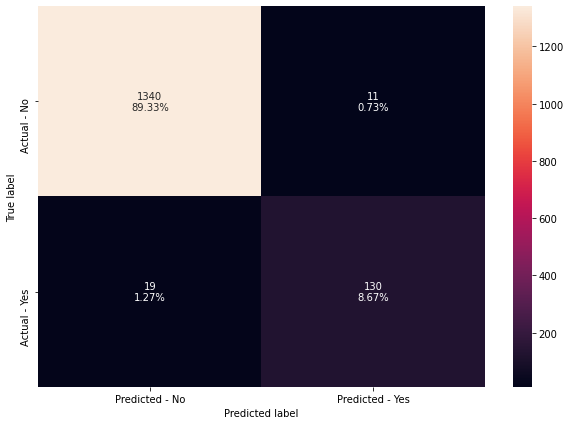

In [1072]:
make_confusion_matrix(dTree,y_test)

In [1073]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.87248322147651


* With post-pruning we get the highest recall on both training and test set

## Visualizing the Decision Tree

In [1074]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'City_City_Other', 'City_Claremont', 'City_Davis', 'City_El Segundo', 'City_Emeryville', 'City_Fallbrook', 'City_Fremont', 'City_Goleta', 'City_Hayward', 'City_Huntington Beach', 'City_Irvine', 'City_La Jolla', 'City_Livermore', 'City_Los Altos', 'City_Los Angeles', 'City_Menlo Park', 'City_Monterey', 'City_Newbury Park', 'City_None', 'City_Northridge', 'City_Oakland', 'City_Palo Alto', 'City_Pasadena', 'City_Redwood City', 'City_Riverside', 'City_Sacramento', 'City_San Diego', 'City_San Francisco', 'City_San Jose', 'City_San Luis Obispo', 'City_Santa Barbara', 'City_Santa Clara', 'City_Santa Cruz', 'City_Santa Monica', 'City_Stanford']


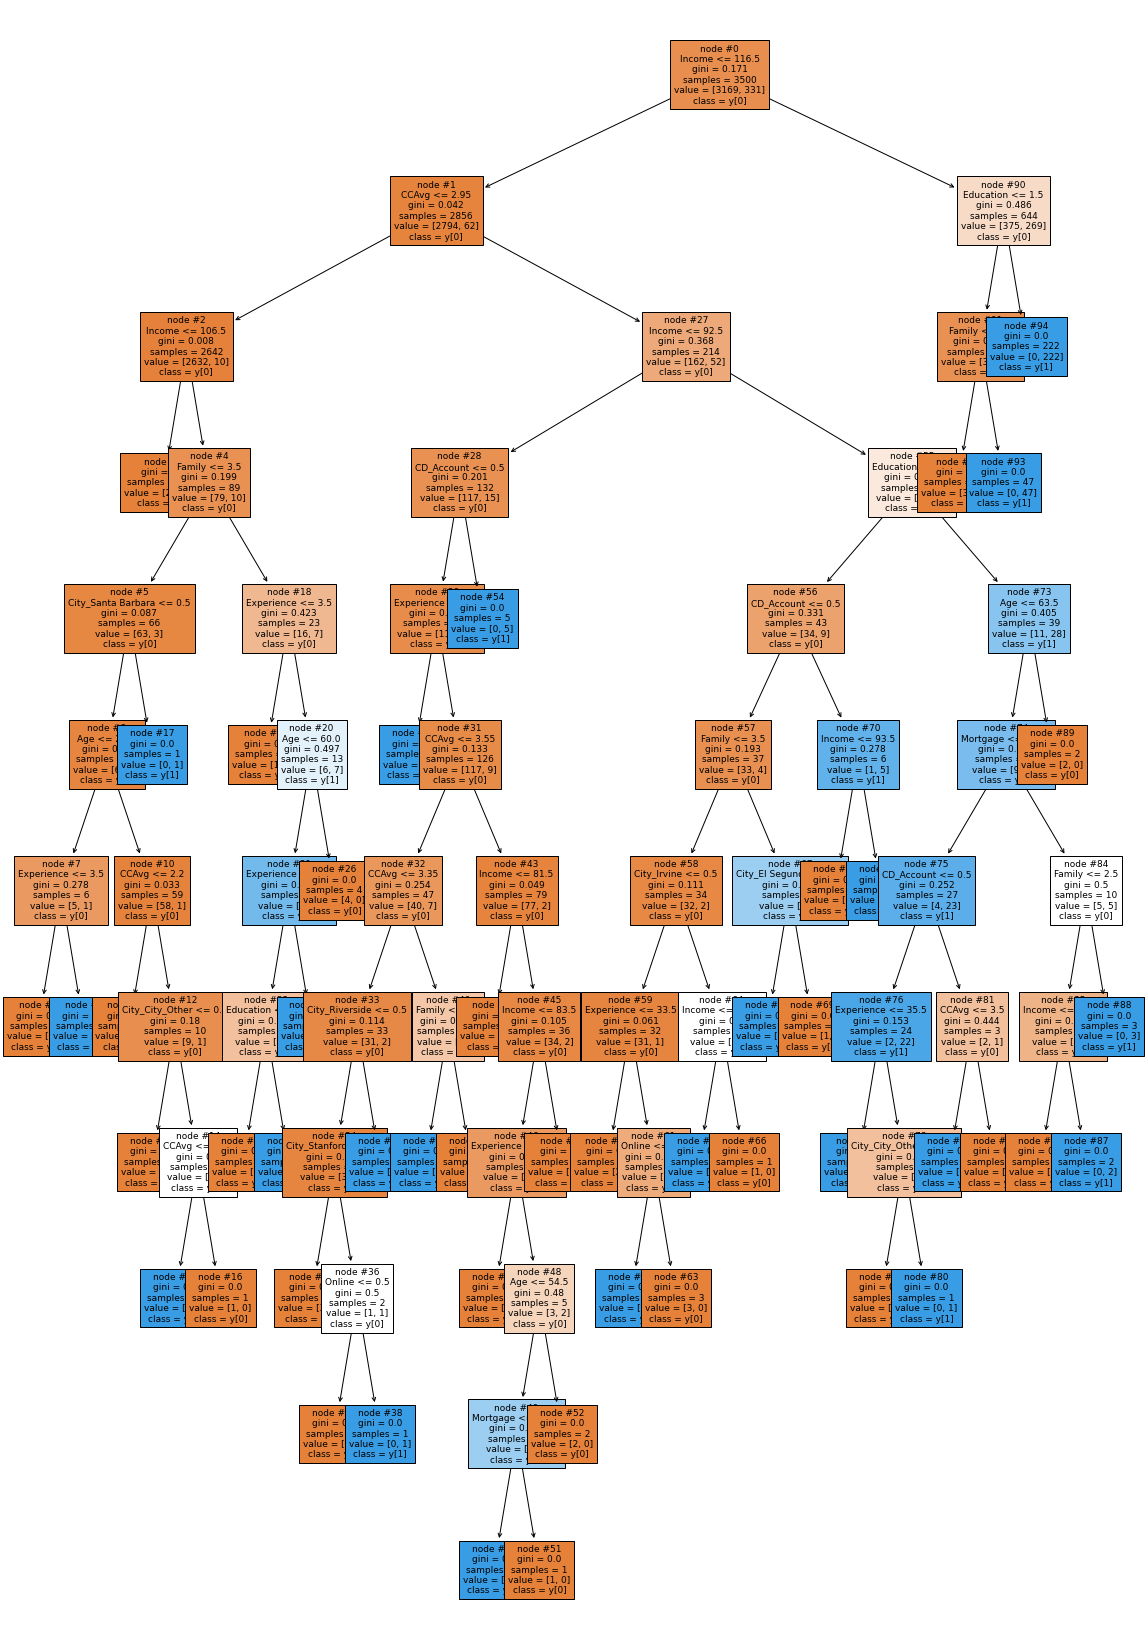

In [1075]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1076]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- City_Santa Barbara <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [49.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- City_City_Other <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- City_City_Other >  0.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 2.55
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   

In [1077]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Education              0.403176
Income                 0.307975
Family                 0.160872
CCAvg                  0.046353
CD_Account             0.025711
Experience             0.020249
Age                    0.011402
Mortgage               0.005239
Online                 0.004171
City_City_Other        0.003559
City_Santa Barbara     0.003087
City_Riverside         0.003037
City_El Segundo        0.002224
City_Stanford          0.001564
City_Irvine            0.001380
City_Davis             0.000000
City_Oakland           0.000000
City_Santa Monica      0.000000
City_Santa Cruz        0.000000
City_Santa Clara       0.000000
Securities_Account     0.000000
City_San Luis Obispo   0.000000
City_San Jose          0.000000
City_San Francisco     0.000000
City_San Diego         0.000000
City_Sacramento        0.000000
CreditCard             0.000000
City_Redwood City      0.000000
City_Pasadena          0.000000
City_Palo Alto         0.000000
City_Nor

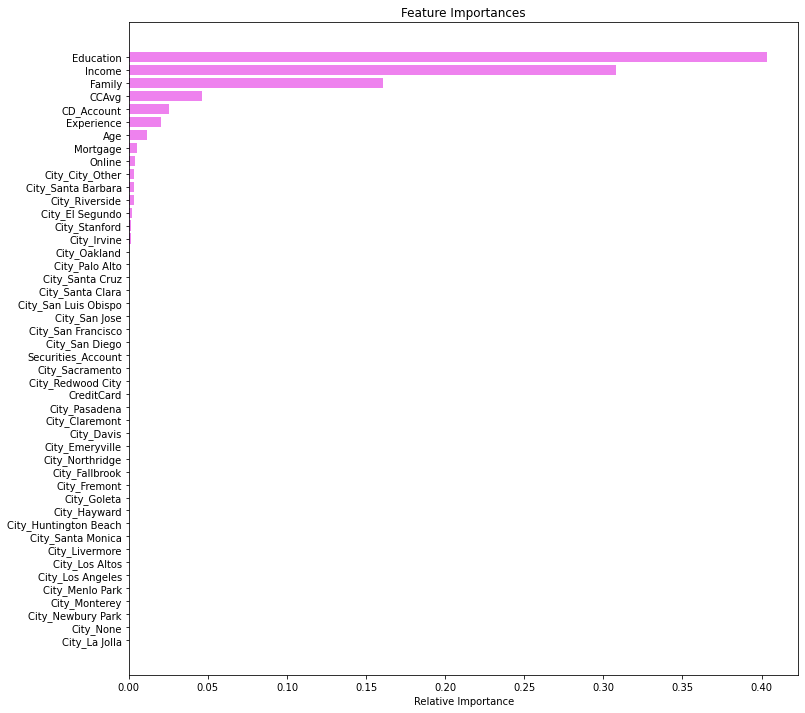

In [1078]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, Education is the most important variable for predicting the customer default.

## Reducing over fitting

In [1079]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Confusion Matrix - decision tree with depth restricted to 3

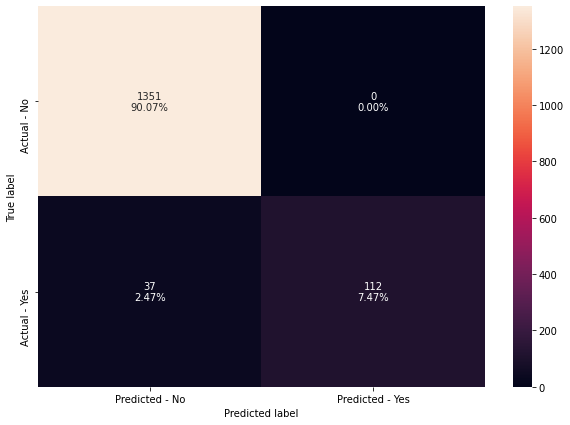

In [1080]:
make_confusion_matrix(dTree1, y_test)

In [1081]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9822857142857143
Accuracy on test set :  0.9753333333333334
Recall on training set :  0.8126888217522659
Recall on test set :  0.7516778523489933


* Recall on training set has reduced from 1 to 0.81 but this is an improvement because now the model is not overfitting and we have a generalized model.

## Visualizing the Decision Tree

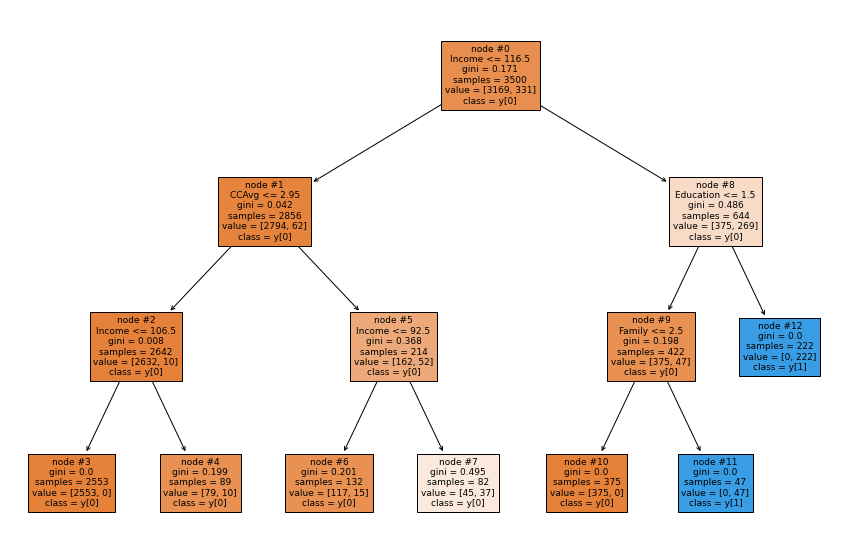

In [1082]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1083]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



In [1084]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Education              0.446593
Income                 0.346997
Family                 0.162372
CCAvg                  0.044038
Age                    0.000000
City_Riverside         0.000000
City_Monterey          0.000000
City_Newbury Park      0.000000
City_None              0.000000
City_Northridge        0.000000
City_Oakland           0.000000
City_Palo Alto         0.000000
City_Pasadena          0.000000
City_Redwood City      0.000000
City_San Francisco     0.000000
City_Sacramento        0.000000
City_San Diego         0.000000
City_Los Angeles       0.000000
City_San Jose          0.000000
City_San Luis Obispo   0.000000
City_Santa Barbara     0.000000
City_Santa Clara       0.000000
City_Santa Cruz        0.000000
City_Santa Monica      0.000000
City_Menlo Park        0.000000
City_Livermore         0.000000
City_Los Altos         0.000000
Experience             0.000000
Mortgage               0.000000
Securities_Account     0.000000
CD_Accou

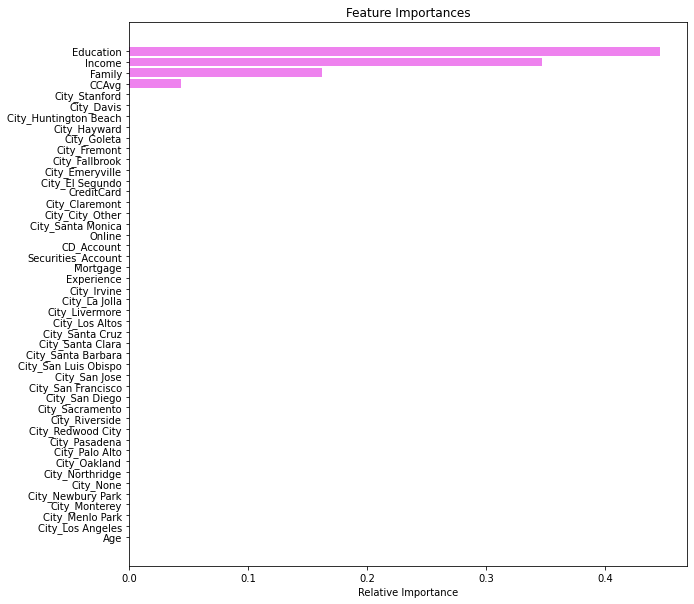

In [1085]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* In important features of previous model, Education was on top. 
* Here Education is still on top as the top important feature.

### Using GridSearch for Hyperparameter tuning of our tree model

In [1086]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

## Confusion Matrix - decision tree with tuned hyperparameters

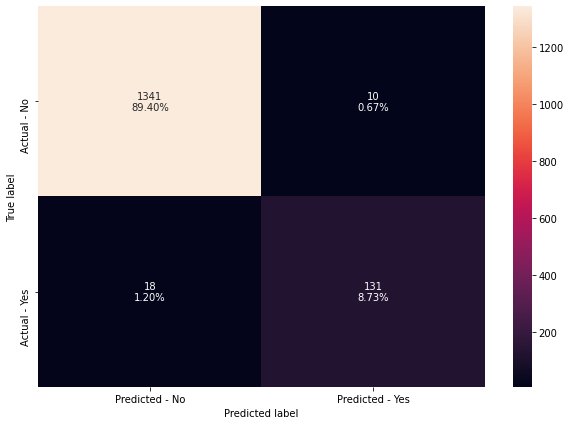

In [1087]:
make_confusion_matrix(estimator,y_test)

In [1088]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832


* After tuning hyperparameters, the performance of the model has become more generalized.
* Recall has increased from 0.81 to 0.92

## Visualizing the Decision Tree

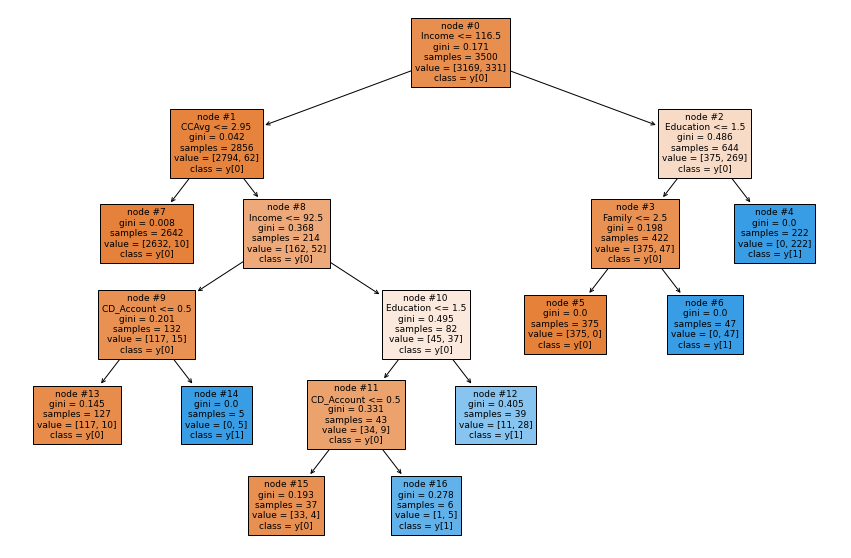

In [1089]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1090]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



In [1091]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                            Imp
Education              0.447999
Income                 0.328713
Family                 0.155711
CCAvg                  0.042231
CD_Account             0.025345
Age                    0.000000
City_Sacramento        0.000000
City_Newbury Park      0.000000
City_None              0.000000
City_Northridge        0.000000
City_Oakland           0.000000
City_Palo Alto         0.000000
City_Pasadena          0.000000
City_Redwood City      0.000000
City_Riverside         0.000000
City_San Jose          0.000000
City_San Diego         0.000000
City_San Francisco     0.000000
City_Menlo Park        0.000000
City_San Luis Obispo   0.000000
City_Santa Barbara     0.000000
City_Santa Clara       0.000000
City_Santa Cruz        0.000000
City_Santa Monica      0.000000
City_Monterey          0.000000
City_Livermore         0.000000
City_Los Angeles       0.000000
City_Los Altos         0.000000
Mortgage               0.000000
Securities_Account     0.000000
Online  

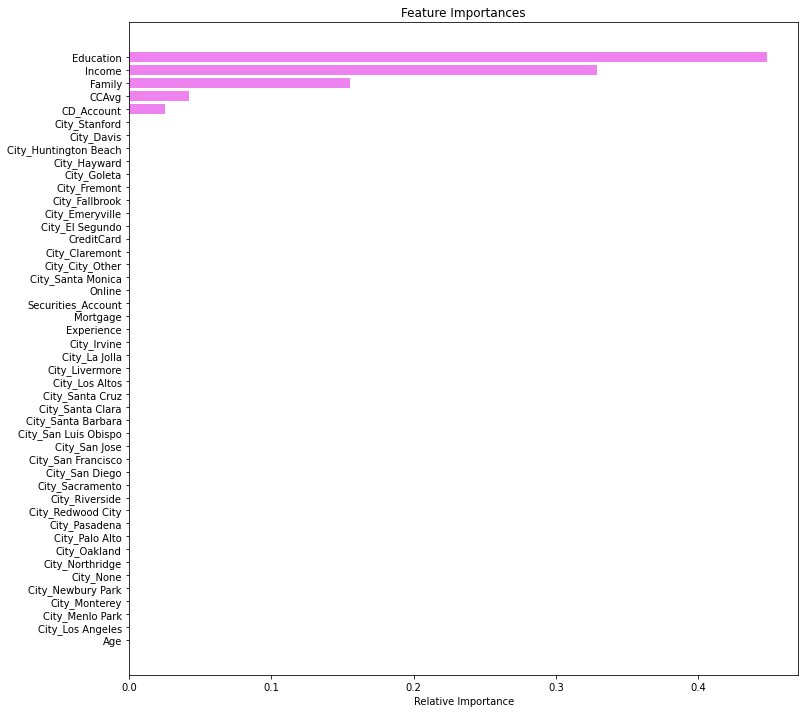

In [1092]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning

In [1093]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [1094]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000187,0.000562
2,0.000223,0.001676
3,0.000269,0.002751
4,0.000273,0.003297
5,0.000277,0.003851
6,0.000381,0.004232
7,0.000381,0.004613
8,0.000381,0.004994
9,0.000381,0.005375


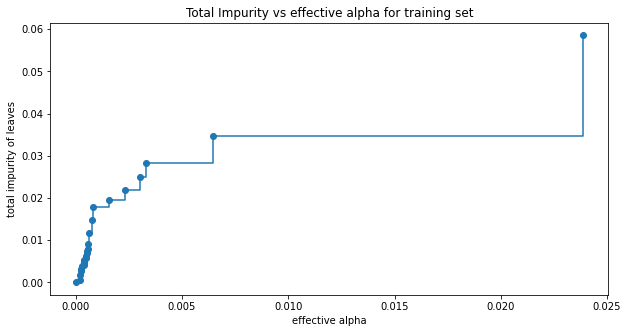

In [1095]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [1096]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

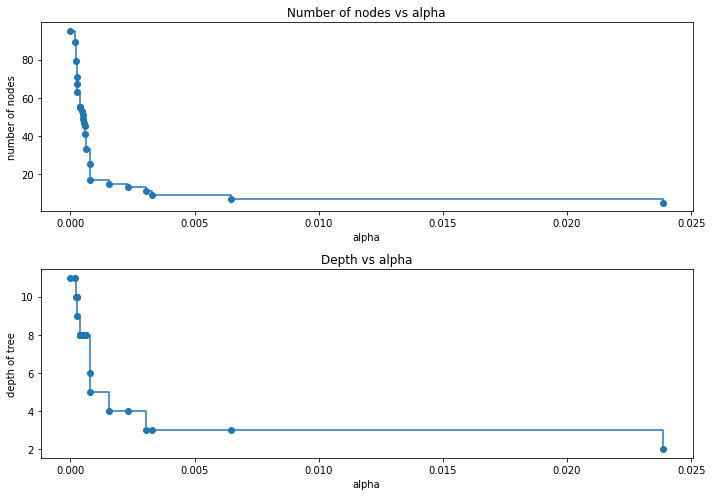

In [1097]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 69% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [1098]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

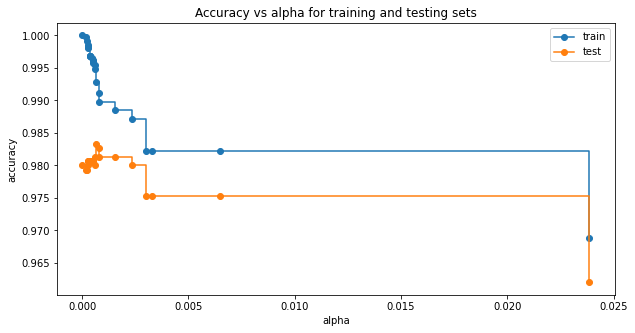

In [1099]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [1100]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)
Training accuracy of best model:  0.9928571428571429
Test accuracy of best model:  0.9833333333333333


#### Since accuracy isn't the right metric for our data we would want high recall

In [1101]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [1102]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

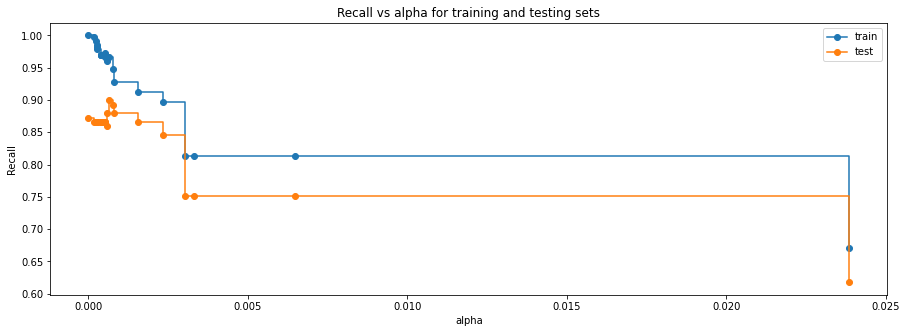

In [1103]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [1104]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


## Confusion Matrix - post-pruned decision tree

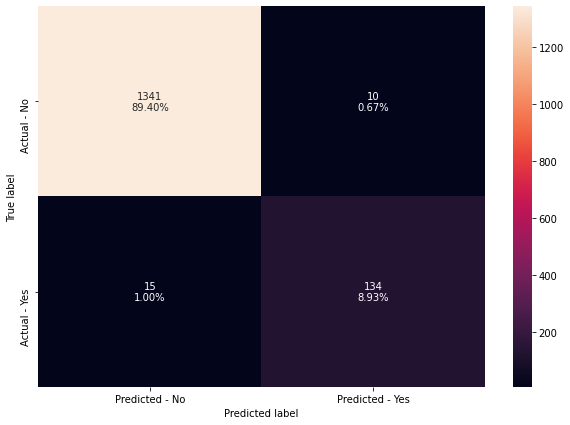

In [1105]:
make_confusion_matrix(best_model,y_test)

In [1106]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9667673716012085
Recall on test set :  0.8993288590604027


* With post-pruning we get the high recall on both training and test set

## Visualizing the Decision Tree

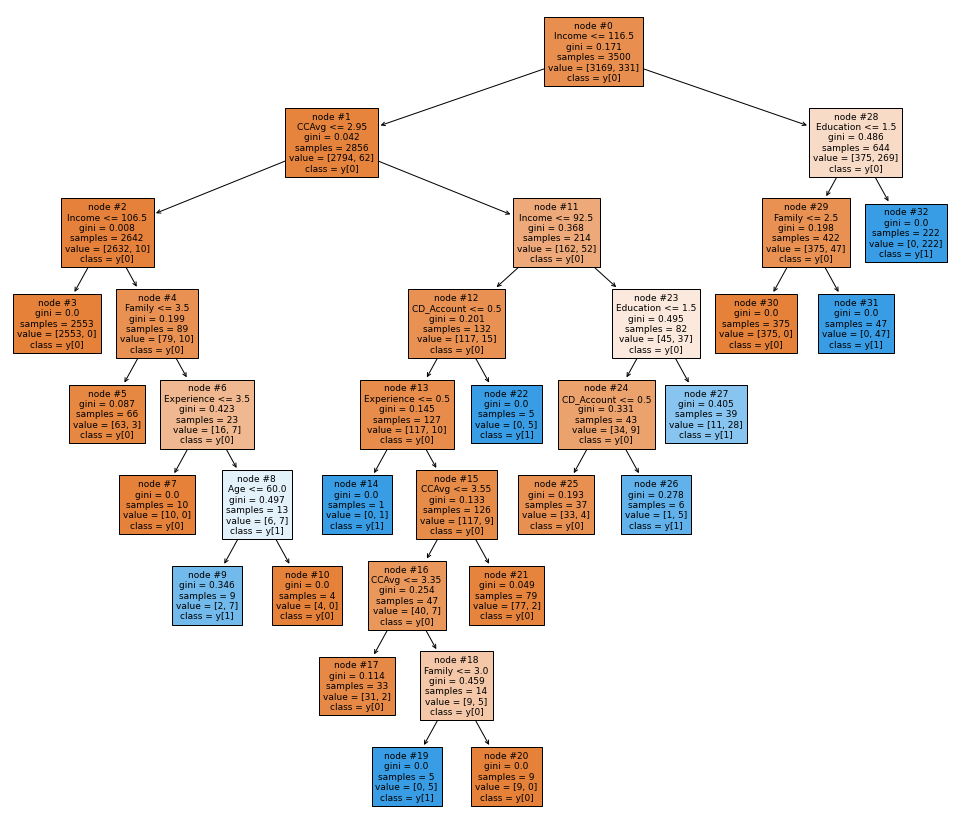

In [1107]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1108]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [2.00, 7.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Experience <= 0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Experience >  0.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |  

In [1109]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Education              0.430462
Income                 0.319735
Family                 0.165225
CCAvg                  0.045288
CD_Account             0.024353
Experience             0.008935
Age                    0.006001
City_Riverside         0.000000
City_Newbury Park      0.000000
City_None              0.000000
City_Northridge        0.000000
City_Oakland           0.000000
City_Palo Alto         0.000000
City_Pasadena          0.000000
City_Redwood City      0.000000
City_San Francisco     0.000000
City_Sacramento        0.000000
City_San Diego         0.000000
City_Menlo Park        0.000000
City_San Jose          0.000000
City_San Luis Obispo   0.000000
City_Santa Barbara     0.000000
City_Santa Clara       0.000000
City_Santa Cruz        0.000000
City_Santa Monica      0.000000
City_Monterey          0.000000
City_Livermore         0.000000
City_Los Angeles       0.000000
City_El Segundo        0.000000
Mortgage               0.000000
Securiti

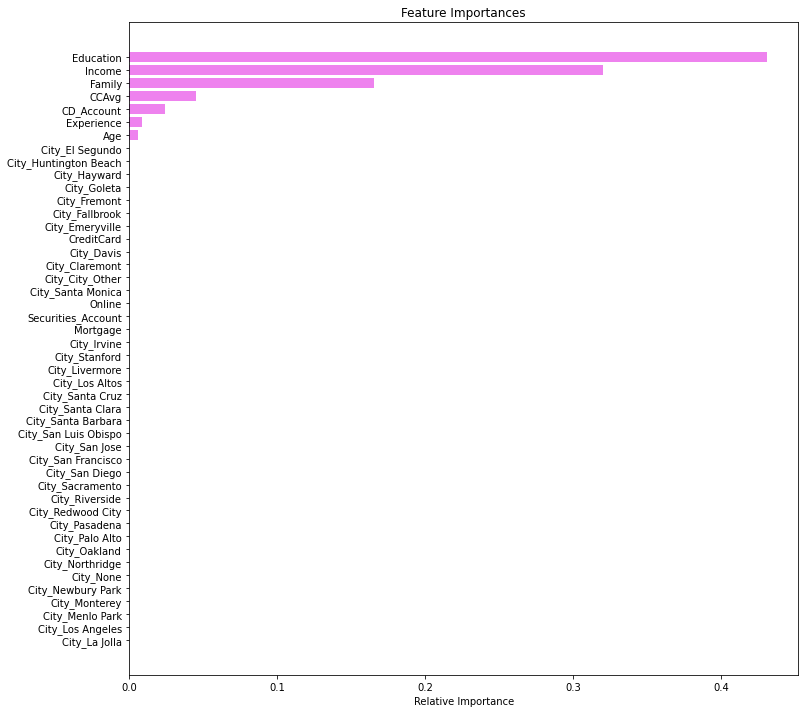

In [1110]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1115]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1.0,1.0,0.81,0.96], 'Test_Recall':[0.98,0.87,0.75,0.89]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.98
1,Decision tree with restricted maximum depth,1.00,0.87
2,Decision treee with hyperparameter tuning,0.81,0.75
3,Decision tree with post-pruning,0.96,0.89


**The initial decision tree model is giving the highest test recall**